<a href="https://colab.research.google.com/github/FeliciaHester/Felicia-Hester.Food-Hub-App-Project/blob/main/1_21_25_Copy_of_Food_Hub_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import the required libraries.



In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Import and Read the Food Hub CSV file.

In [ ]:
# Import CSV file
df = pd.read_csv('/foodhub_order.csv')

### What is the structure of the data?

In [ ]:
# Read the data
df = pd.read_csv('/foodhub_order.csv')

# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### How many rows and columns are present?

In [ ]:
# Check the shape of the dataset
df.shape #(1898, 9)

(1898, 9)

### What are the datatypes of the different columns?

In [ ]:
# What are the different columns in the data set and what are their data types
df.info()

# Print each data type for each colum
print(df.dtypes)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      

### Are there any missing values?

In [ ]:
# Checking for missing values in the data
missing_values = df.isna().sum()


  # Write the appropriate function to print the sum of null values for each column
print(missing_values)


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


### What is the statistical summary of the data? What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Get the summary statistics of the numerical data
summary_stats = df.describe()

 # Write the appropriate function to print the statistical summary of the data (Hint: you have seen this in the case studies before)
print(summary_stats)

 # What is the minimum time it takes to prepare food once an order is placed
min_value = df['food_preparation_time'].min()

# Print the minimum time it takes for food to be prepared once an order is placed
print(f"The minimum 'food_preparation_time'is: {round(min_value)} minutes")

 # What is the average time it takes to prepare food once an order is placed
mean_value = df['food_preparation_time'].mean()

 # Print the average time it takes for food to be prepared once an order is placed
print(f"The average 'food_preparation_time'is: {round(mean_value)} minutes")

 # What is the maximun time it takes to prepare food once an order is placed
max_value = df['food_preparation_time'].max()

 # Print the maximum time it takes for food to be prepared once an order is placed
print(f"The maximum 'food_preparation_time'is: {round(max_value)} minutes")





           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  
The minimum 'food_preparation_time'is: 20 minutes
The average 'food_prep

### How many orders are not rated?

In [ ]:
# Define the target string you are looking for
target_string = 'Not given'

# Check how many times the target string is in the name of the column you are looking in
column_occurrences = (df['rating'] == target_string).sum()

# Print the result
print(f"The string '{target_string}' occurs {column_occurrences} times in the rating column.")





The string 'Not given' occurs 736 times in the rating column.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Explore all the variables and provide observations on their distributions.

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Restaurant name

In [ ]:
# check the number of unique Restaurant Names
df['restaurant_name'].nunique()


178

#### Cuisine type

In [ ]:
# Check the number of unique cuisine types
df['cuisine_type'].nunique()

14

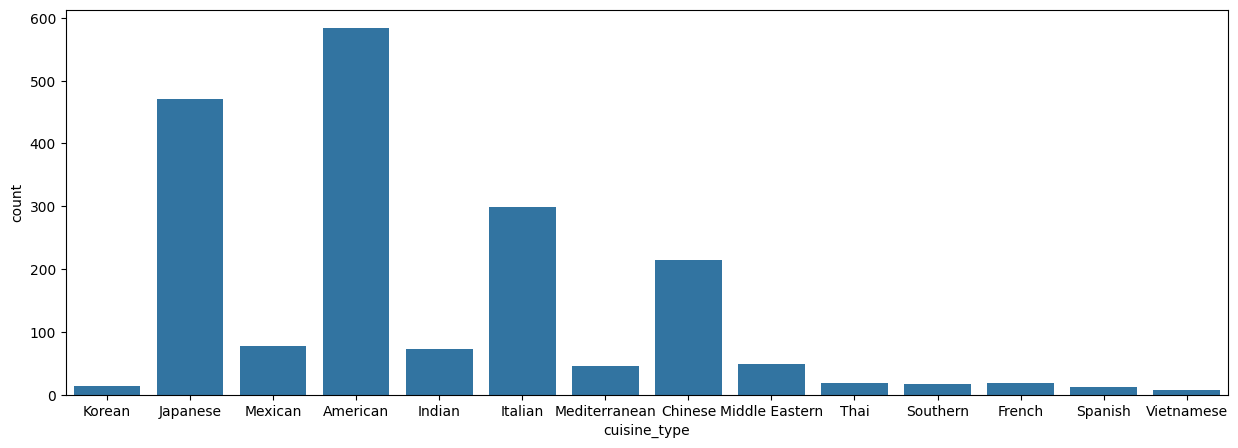

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') # Create a countplot for cuisine type
plt.savefig("output.jpg", bbox_inches='tight')

#### Cost of the order

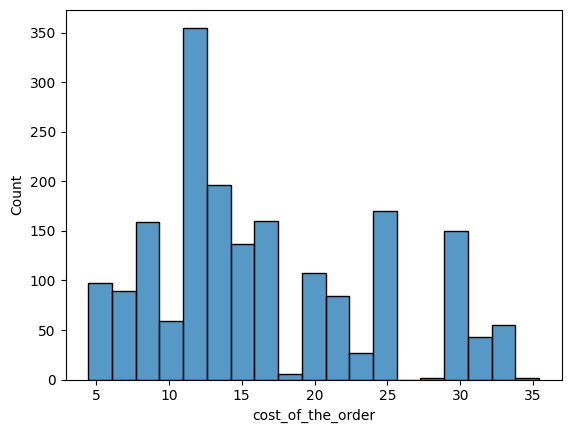

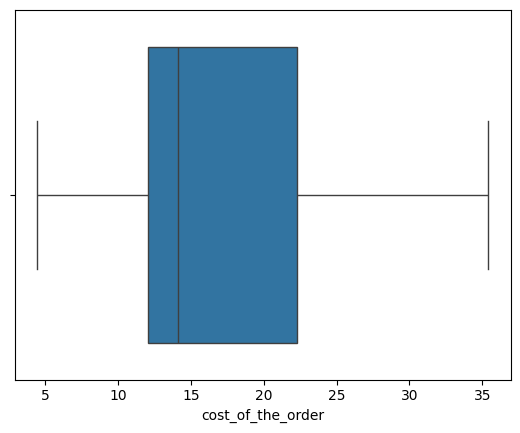

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].value_counts() # Complete the code to check unique values for the 'day_of_the_week' column



,count
day_of_the_week,
Weekend,1351
Weekday,547


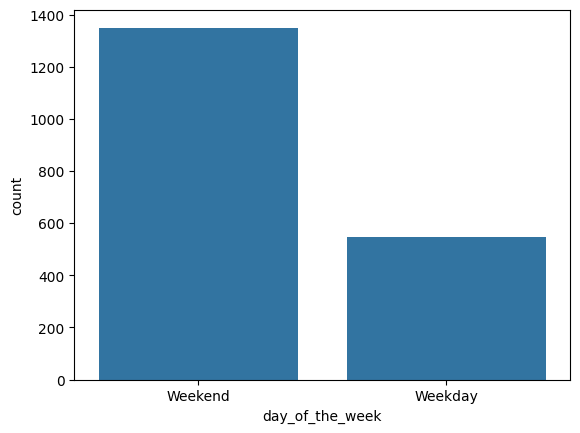

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week') # Complete the code to plot a bar graph for 'day_of_the_week' column
plt.savefig("output.jpg", bbox_inches='tight')

#### Rating

In [ ]:
# Check the unique values
df['rating'].value_counts() # Complete the code to check unique values for the 'rating' column

,count
rating,
Not given,736
5,588
4,386
3,188


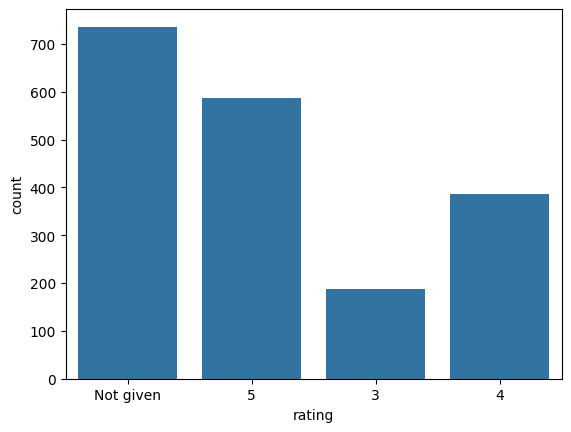

In [ ]:
sns.countplot(data = df, x = 'rating') # Complete the code to plot bar graph for 'rating' column
plt.savefig("output.jpg", bbox_inches='tight')

#### Food Preparation time

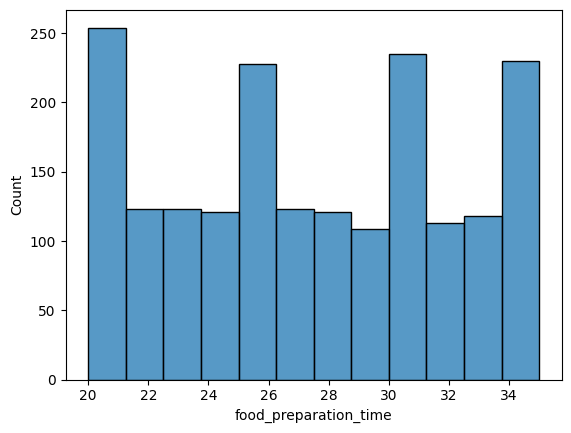

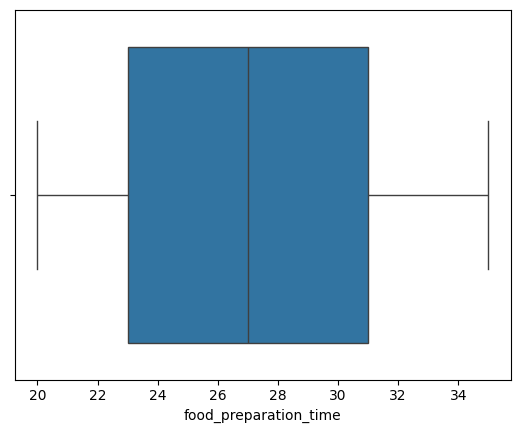

<Figure size 640x480 with 0 Axes>

In [ ]:
# data for food preparation time
df['food_preparation_time'].value_counts()



sns.histplot(data=df,x='food_preparation_time') # Complete the code to plot the histogram for the cost of order
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')
sns.boxplot(data=df,x='food_preparation_time') # Complete the code to plot the boxplot for the cost of order
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Delivery time

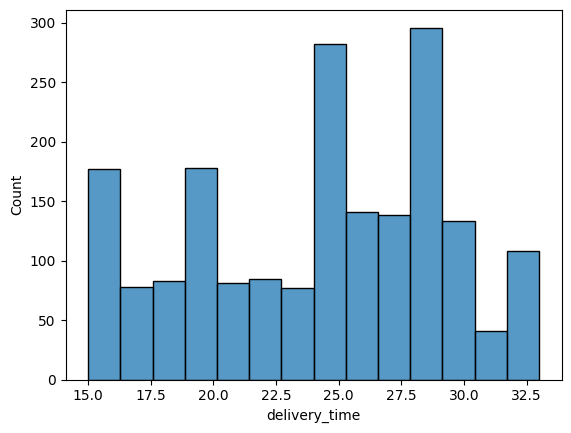

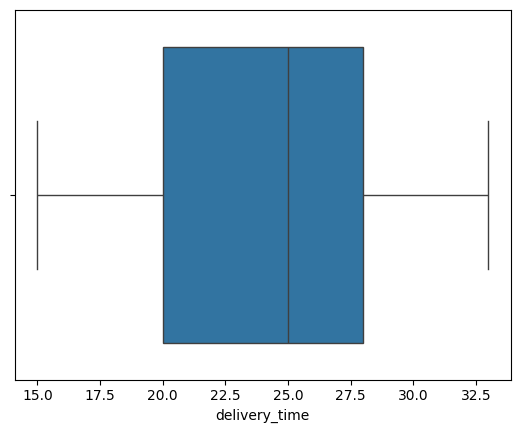

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.histplot(data=df,x='delivery_time') # Complete the code to plot the histogram for the delivery time
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')
sns.boxplot(data=df,x='delivery_time')  # Complete the code to plot the boxplot for the delivery time
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

### Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].head() # Complete the code

,restaurant_name
0,Hangawi
1,Blue Ribbon Sushi Izakaya
2,Cafe Habana
3,Blue Ribbon Fried Chicken
4,Dirty Bird to Go


### Which is the most popular cuisine on weekends?

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() # Complete the code to check unique values for the cuisine type on weekend

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


### What percentage of the orders cost more than 20 dollars?

In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] # Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### What is the mean order delivery time?

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  # Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### For the company to give 20% discount vouchers to the top 3 most frequent customers, find the IDs of these customers and the number of orders they placed.

In [ ]:
# Get the counts of each customer_id
df['customer_id'].value_counts().head()  # Write the appropriate column name to get the 5 most frequent customers

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


### Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset.

#### Cuisine vs Cost of the order

<ipython-input-46-0123af1f1611>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


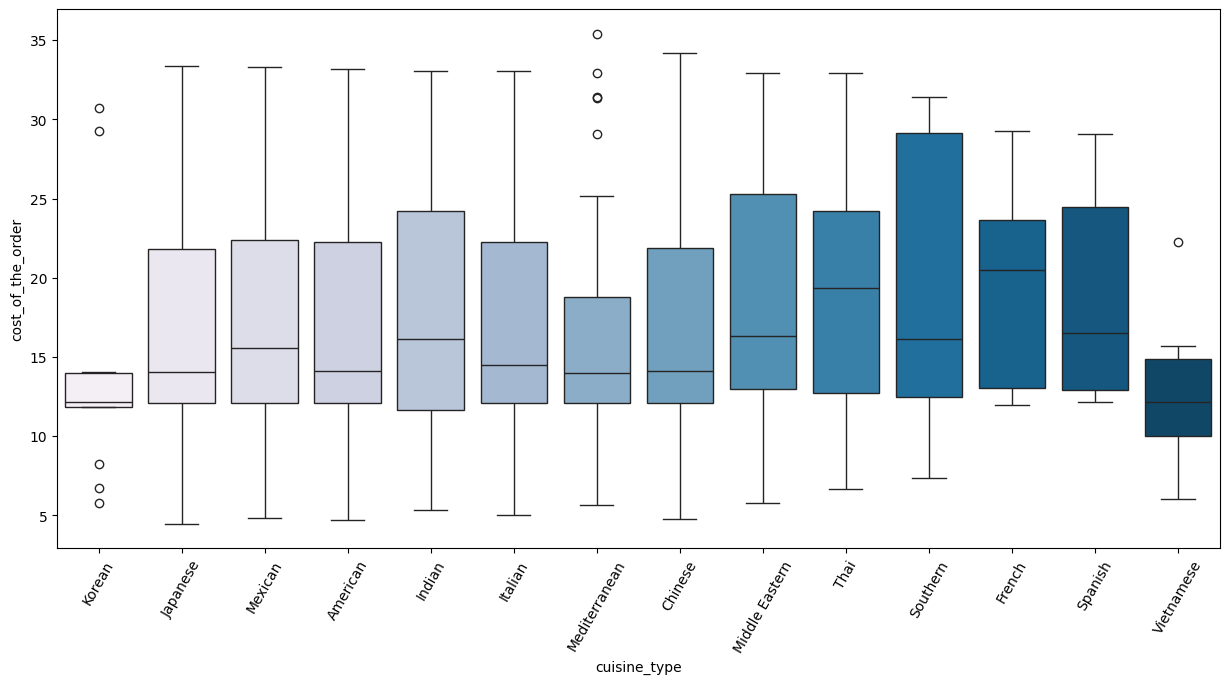

<Figure size 640x480 with 0 Axes>

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Cuisine vs Food Preparation time

In [ ]:
# Generate a list of cuisine types and their preparation time
df[['cuisine_type', 'food_preparation_time']].groupby(['cuisine_type']).mean().sort_values(by = 'food_preparation_time', ascending = False)






,food_preparation_time
cuisine_type,
Southern,27.588235
Chinese,27.511628
Japanese,27.510638
Italian,27.483221
American,27.440068
Thai,27.315789
Indian,27.109589
Mediterranean,27.000000
Spanish,26.916667


<ipython-input-48-a55ef071545f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x = 'food_preparation_time', y = 'cuisine_type', data = df, palette = 'PuBu')  # Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot


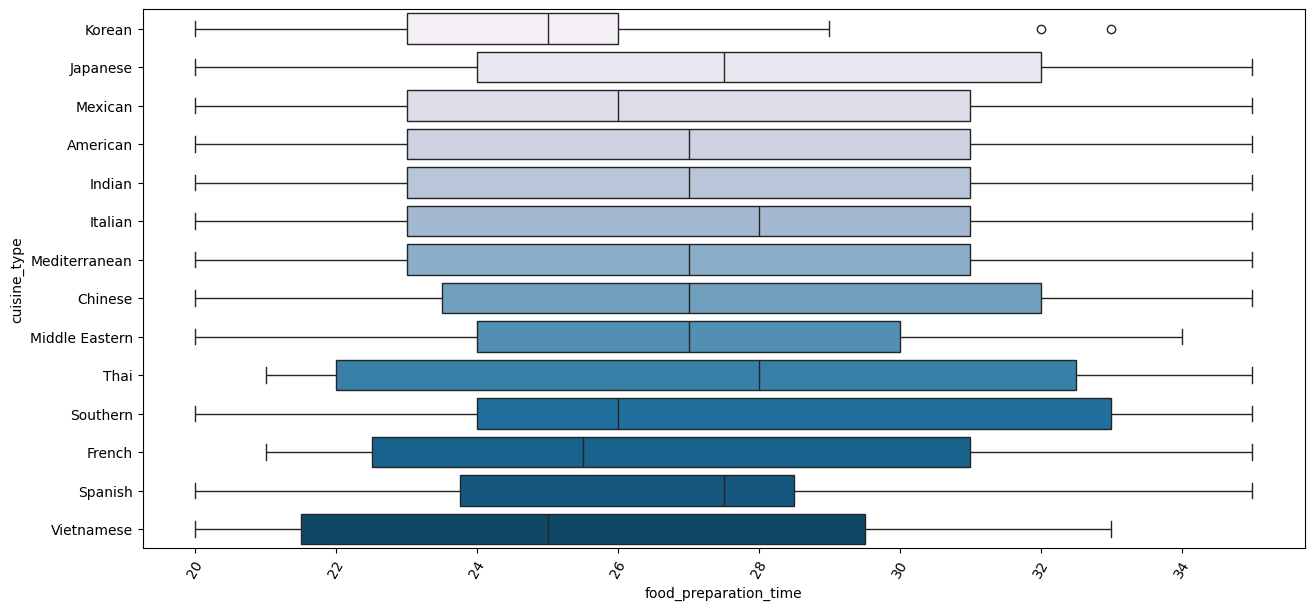

<Figure size 640x480 with 0 Axes>

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot( x = 'food_preparation_time', y = 'cuisine_type', data = df, palette = 'PuBu')  # Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Day of the Week vs Delivery time

In [ ]:
# Generate a list of Day of the Week and the Delivery Time
df[['day_of_the_week', 'delivery_time']].groupby(['day_of_the_week']).mean().sort_values(by = 'delivery_time', ascending = False)

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


<ipython-input-50-652e31806376>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, palette = 'PuBu') # Complete the code to visualize the relationship between day of the week and delivery time using boxplot


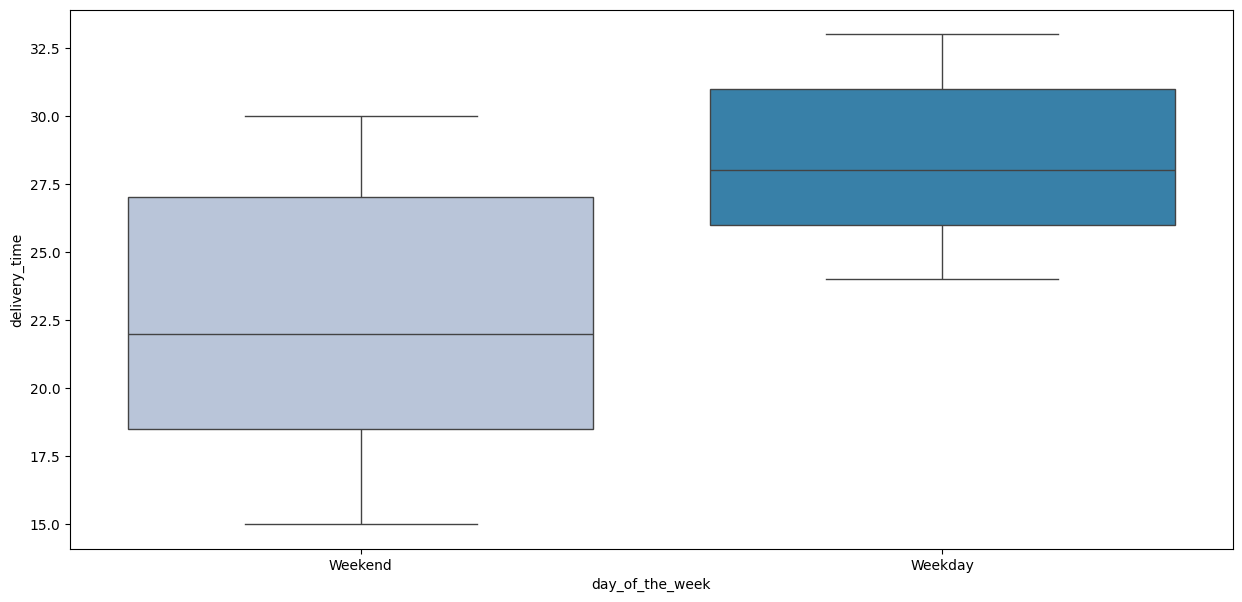

<Figure size 640x480 with 0 Axes>

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, palette = 'PuBu') # Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [ ]:
df.groupby(['restaurant_name', 'cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,,cost_of_the_order
restaurant_name,cuisine_type,
Shake Shack,American,3579.53
Blue Ribbon Sushi,Japanese,1903.95
The Meatball Shop,Italian,1821.01
Blue Ribbon Fried Chicken,American,1662.29
Parm,Italian,1112.76
RedFarm Broadway,Chinese,965.13
RedFarm Hudson,Chinese,921.21
TAO,Japanese,834.50
Han Dynasty,Chinese,755.29


#### Rating vs Delivery time

In [ ]:
# Compare Rating and Delivery Time
df[['rating', 'delivery_time']].groupby(['rating']).mean().sort_values(by = 'delivery_time', ascending = False)

,delivery_time
rating,
3,24.558511
5,24.212585
Not given,24.173913
4,23.867876


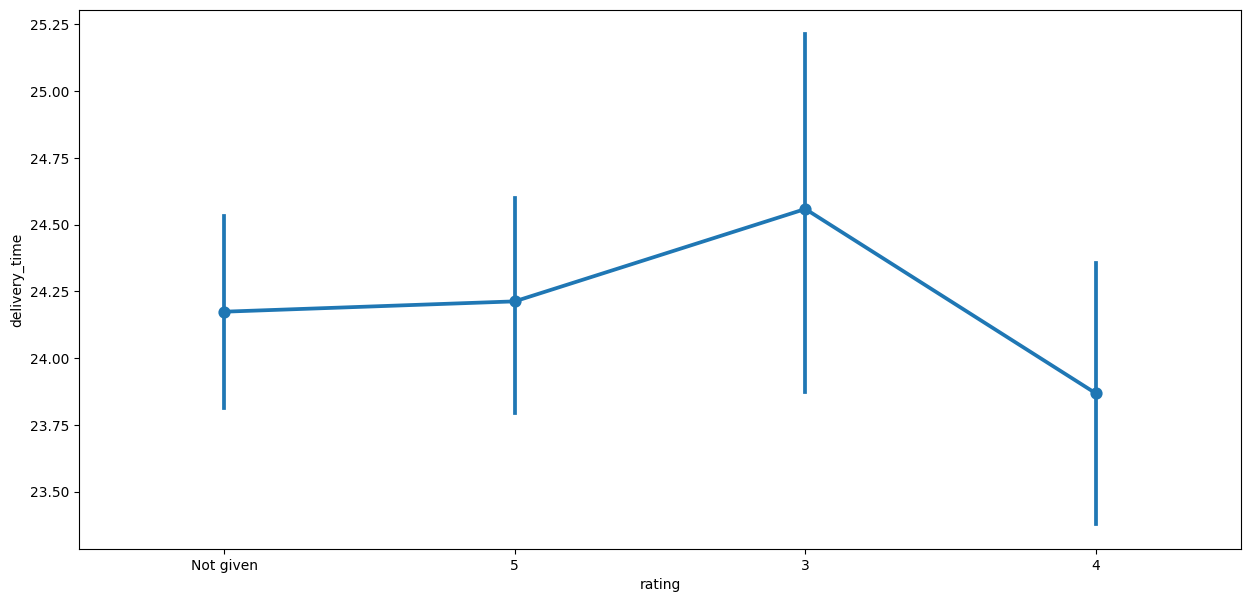

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

In [ ]:
# Compare Rating and Food Preparation Time
df[['rating', 'food_preparation_time']].groupby(['rating']).mean().sort_values(by = 'food_preparation_time', ascending = False)

,food_preparation_time
rating,
3,27.430851
4,27.396373
Not given,27.357337
5,27.355442


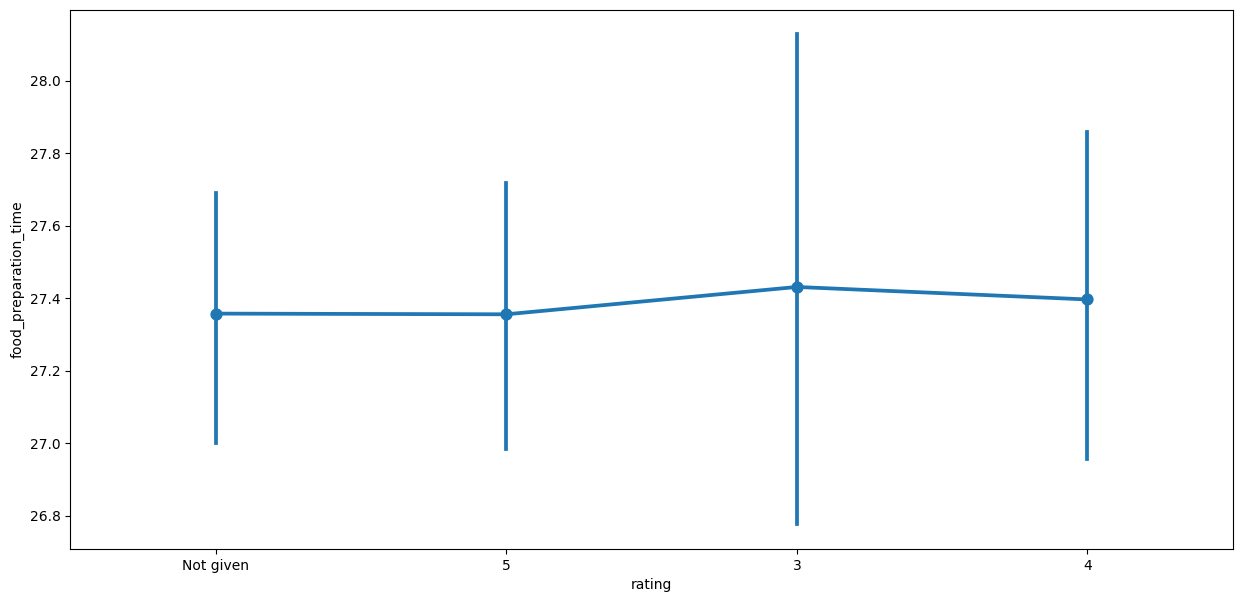

<Figure size 640x480 with 0 Axes>

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  # Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Rating vs Cost of the order

In [ ]:
# Compare Rating and Cost of the Order
df[['rating', 'cost_of_the_order']].groupby(['rating']).mean().sort_values(by = 'cost_of_the_order', ascending = False)

,cost_of_the_order
rating,
5,16.965697
4,16.710337
3,16.223351
Not given,16.085340


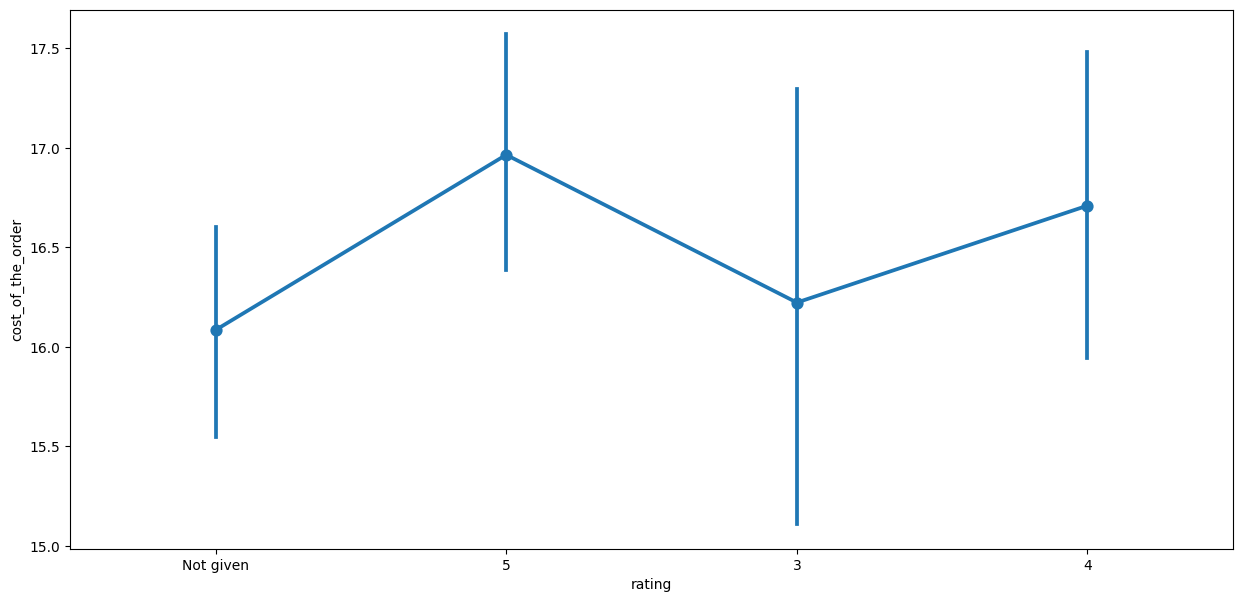

<Figure size 640x480 with 0 Axes>

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   # Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Correlation among variables

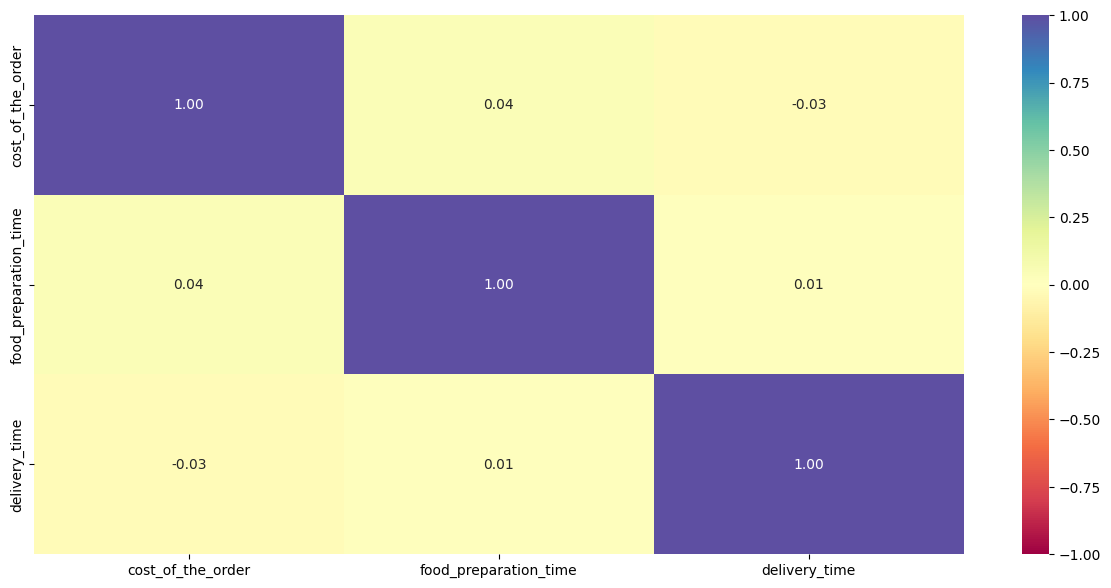

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

### For the company to provide a promotional offer in the advertisement of the restaurants, the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Which restaurants fulfill the criteria to get the promotional offer?

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] # Filter the DataFrame based on rating count

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() # Calculate mean rating for each restaurant






,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. What is the net revenue generated by the company across all orders?

In [ ]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) # Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# Get the total revenue and print it
total_rev = df['Revenue'].apply(compute_rev) # Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 0       1.15
1       0.00
2       0.00
3       1.10
4       0.00
        ... 
1893    0.84
1894    0.00
1895    0.95
1896    0.00
1897    0.00
Name: Revenue, Length: 1898, dtype: float64 dollars


### Look at the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


# Write the code below to find the percentage of orders that have more than 60
# minutes of total delivery time (see Question 9 for reference) Get orders that have more than 60 minutes of total delivery time
df_greater_than_60 = df[df['total_time']>60]

# Calculate the number of orders where the delivery time is more than 60 minutes
print('The number of orders with a delivery time more than 60 minutes is:', df_greater_than_60.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100
print("Percentage of orders that have more than 60 minutes total delivery time is:", round(percentage, 2), '%')



The number of orders with a delivery time more than 60 minutes is: 200
Percentage of orders that have more than 60 minutes total delivery time is: 10.54 %


### Look at the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### Conclusions from the analysis? Recommendations to help improve the business?

### Conclusions and Recommendations:

*  It is my recommendation for Food Hub to have a full circle approach to their growth objective.
* This can be accomplished by building a marketing strategy around what is already successful for them, leveraging their existing customer base.
* To increase their customer base, they should offer a promo for existing users via a “refer a friend” campaign.
* To increase sales in lesser performing cuisine categories, this promo should be applicable to the restaurants serving the lesser performing cuisines.
* Another avenue to capitalize on would be to offer a promo for existing top performing restaurants, who are also serving the top ranking cuisine categories.
* To address the need for increasing sales on weekdays, they should offer a promo through the top performing restaurants, on weekdays only.
* The top customers can be marketed to by strategically appealing to the practicality of the time they will save by ordering out. With the promotion, customers can eat out for a comparable cost as cooking at home, without the time and effort of actually cooking at home.


---